# _NCATS Metadata Provider - Metadata Annotation Pipeline_

[Stanford Center for Biomedical Informatics Research](https://bmir.stanford.edu/), 1265 Welch Road, Stanford University School of Medicine, Stanford, CA 94305-5479, USA

\* Correspondence: marcosmr@stanford.edu

## Purpose of this document

This document is a [Jupyter notebook](http://jupyter.org/) that describes the work done during the first segment of the NCATS award to develop a prototype metadata-annotation functionality and to apply it to a subset of metadata records in the NCBI BioSample repository.

The scripts used to generate the results are available in the [scripts folder](./scripts). The results generated when running the code cells in this notebook will be saved to a local `workspace` folder.

## Table of contents
* [Viewing and running this notebook](#s0)
* [Step 1. Dataset download](#s1)
* [Step 2: Filter - Homo sapiens](#s2)
* [Step 3: Exploratory analysis](#s3)
* [Step 4: Filter by attribute names and values](#s4)
* [Step 5: Export to CSV](#s5)
* [Step 6: Analysis of unique values](#s6)
* [Step 7: Export BioProject metadata to JSON](#s7)
* [Step 8: Export BioSample metadata to JSON](#s8)
* [Step 9: Semantic annotation](#s9)
* [Step 10: Evaluation of annotation results](#s10)
* [Step 11: Store metadata into MongoDB](#s11)

## <a name="s0"></a>Viewing and running this notebook

GitHub will automatically generate a static online view of this notebook. However, current GitHub's rendering does not support some features, such as the anchor links that connect the 'Table of contents' to the different sections. A more reliable way to view the notebook file online is by using [nbviewer](https://nbviewer.jupyter.org/), which is the official viewer of the Jupyter Notebook project. [Click here](https://nbviewer.jupyter.org/github/metadatacenter/metadata-provider/blob/master/metadata-provider-annotator/translator-demo.ipynb) to open our notebook using nbviewer.

The interactive features of our notebook will not work neither from GitHub nor nbviewer. For a fully interactive version of this notebook, you can set up a Jupyter Notebook server locally and start it from the local folder where you cloned the repository. For more information, see [Jupyter's official documentation](https://jupyter.org/install.html). Once your local Jupyter Notebook server is running, go to [http://localhost:8888/](http://localhost:8888/) and click on `translator-demo.ipynb` to open our notebook. You can also run the notebook on [Binder](https://mybinder.org/) by clicking [here](https://mybinder.org/v2/gh/metadatacenter/metadata-provider/626f4fa749ba87259fb23fb8550dc9955eca800e).

## <a name="s1"></a>Step 1: Dataset download
On Feb 20, 2020, we downloaded the full content of the [NCBI BioSample database](https://www.ncbi.nlm.nih.gov/biosample/) from the [NCBI BioSample FTP repository](https://ftp.ncbi.nih.gov/biosample/) as a .gz file. The size of the file downloaded is 944 MB and it contains 12,558,194 samples. To enrich the downloaded metadata with some basic information from the associated projects, we have also  downloaded the full content of the [NCBI BioProject database](https://www.ncbi.nlm.nih.gov/bioproject/) from the [NCBI BioProject FTP repository](https://ftp.ncbi.nlm.nih.gov/bioproject/). 

Script used: [step1_download.py](scripts/step1_download.py).

In [2]:
%%time
# Filter the NCBI samples
%run ./scripts/step1_download.py

Source URL: https://ftp.ncbi.nih.gov/biosample/biosample_set.xml.gz
Destination file: ./workspace/samples/source/biosample_set.xml.gz
CPU times: user 18.2 s, sys: 7.97 s, total: 26.2 s
Wall time: 51.7 s


## <a name="s2"></a>Step 2: Filter - Homo sapiens

We filtered the initial set of samples to keep only the "Homo sapiens" samples (organism=Homo sapiens). We processed a total of 12,558,194 samples and kept a total of 6,279,693 Homo sapiens samples.

Script used: [step2_filter_homo_sapiens.py](scripts/step2_filter_homo_sapiens.py).

In [1]:
%%time
# Filter the NCBI samples
%run ./scripts/step2_filter_homo_sapiens.py

The destination file already exist. Do you want to overwrite it [y/n]?Y
Input file: ./../workspace/samples/source/biosample_set.xml.gz
Output file: ./../workspace/samples/filtered/homo_sapiens/biosample_filtered.xml
Processing NCBI samples...
Processed samples: 100000
Selected samples: 37112
Processed samples: 200000
Selected samples: 82285
Processed samples: 300000
Selected samples: 141486
Processed samples: 400000
Selected samples: 241486
Processed samples: 500000
Selected samples: 341486
Processed samples: 600000
Selected samples: 436907
Processed samples: 700000
Selected samples: 518736
Processed samples: 800000
Selected samples: 594660
Processed samples: 900000
Selected samples: 694660
Processed samples: 1000000
Selected samples: 778747
Processed samples: 1100000
Selected samples: 854501
Processed samples: 1200000
Selected samples: 953406
Processed samples: 1300000
Selected samples: 1053405
Processed samples: 1400000
Selected samples: 1153405
Processed samples: 1500000
Selected sa

## <a name="s3"></a>Step 3: Exploratory analysis

In this step, we performed a preliminary analysis on the frequency of attribute names and attribute values in the BioSample database. We will use the results obtained later, to drive the selection of the attribute names and values that will be used to demonstrate our prototype. The goal is to select a small set of attribute names and values that are both relevant from a resesarch point of view and representative of the BioSample database content. This analysis is limited to the 6.3M BioSample Homo sapiens samples coming from the previous step. 

Script used: [step3_analysis_attributes.py](scripts/step3_analysis_attributes.py).

The execution of this step will generate four .csv files with the values of the three attributes used in the BioSample XML file to store the attribute names:
* attribute_names.csv: Attribute names and their frequency.
* display_names.csv: Display names and their frequency.
* harmonized_names.csv: Harmonized names and their frequency.
* all_names.csv: Combination of attribute name, display name, and harmonized name, and their frequencies.

These files will be stored at the [workspace/samples/analysis](workspace/samples/analysis) folder.

In [1]:
%%time
# Filter the NCBI samples
%run ./scripts/step3_analysis_attributes.py

Input file: ./workspace/samples/filtered/homo_sapiens/biosample_filtered.xml
Processing NCBI samples...
Processed samples: 100000
Processed samples: 200000
Processed samples: 300000
Processed samples: 400000
Processed samples: 500000
Processed samples: 600000
Processed samples: 700000
Processed samples: 800000
Processed samples: 900000
Processed samples: 1000000
Processed samples: 1100000
Processed samples: 1200000
Processed samples: 1300000
Processed samples: 1400000
Processed samples: 1500000
Processed samples: 1600000
Processed samples: 1700000
Processed samples: 1800000
Processed samples: 1900000
Processed samples: 2000000
Processed samples: 2100000
Processed samples: 2200000
Processed samples: 2300000
Processed samples: 2400000
Processed samples: 2500000
Processed samples: 2600000
Processed samples: 2700000
Processed samples: 2800000
Processed samples: 2900000
Processed samples: 3000000
Processed samples: 3100000
Processed samples: 3200000
Processed samples: 3300000
Processed samp

Note that in the array with the required attributes we only included as variations those strings that don't have a corresponding harmonized name. See official synonyms at: https://www.ncbi.nlm.nih.gov/biosample/docs/attributes/.

Results of analysis for the attributes "sex", "tissue", and "disease".

Attribute name: sex
* Variations (harmonized)
    * sex (4,625,561)
    * Sex (193,644)
    * gender (32,323)
    * GENDER (7,838)
    * ArrayExpress-Sex (3,324)
    * DONOR_SEX (926)
    * donor sex (480)
    * Gender (387)
    * SEX (292)
    * ArrayExpress-SEX (268)
    * sample gender (90)
    * Experimental Factor: Sex (8)
* Variations (non-harmonized)
    * cell sex (2,543)  
    * patient gender (1,038)
    * donor gender (617)
    * patient_gender (417)
    * c_sex_all (483)
    * subject sex (468)
    * subject gender (203)
    * Array's reference DNA's sex (170)
    * DNA sex (102)
    * fetal sex (98) (?)
    * biological sex (92)
    * fetal gender (76) (?)
    * cell line source gender (75)
    * patient sex (73)
    * biologic sex (92)
    * gender source (16) (?)
    * sex of donor (12)
    * gender of donor (12)
    * human gender (12)
    * sex chromosomes (6)
    * sex/karyotype (5)
    * cell source subject gender (3)
    * biological_sex (1)

Attribute name: tissue
* Variations (harmonized)
    * body site (2797078)
	* tissue (454459)
	* organism part (216833)
	* tissue_type (12198)
	* organ (7261)
	* Tissue (4005)
	* tissue type (3723)
	* body_site (3285)
	* tissue-type (2240)
	* source tissue (700)
	* TISSUE_TYPE (467)
	* tissue origin (419)
	* OrganismPart (167)
	* TISSUE (161)
	* ArrayExpress-OrganismPart (148)
	* ArrayExpress-ORGANISM_PART (84)
	* tissuetype (79)
	* tissue_origin (60)
	* tisssue (8)
	* Tissue Type (2)
* Variations (non-harmonized)
	* tissue supergroup (9361) (I've checked that this is equivalent to tissue. Query: "tissue supergroup=lung"[attr]) 
	* tissue source (2680)
	* metastatic tissue (1593)
    * DiseaseLocation (1008)
	* tissue subtype (766)
	* tissue archive method (382)
	* tissue compartment (370)
	* tissue of origin (311)
	* tissue/cell type source (204)
	* tissue region (169)
	* tissue id (153)
	* tissue diagnosis (139)
	* tissue preparation (122)
	* tissue collection (95)
	* tissue/treatment id (84)
	* tissue/cells (74)
	* tissue/position (73)
	* metatastic tissue (68)
	* tissue side (66)
	* resident tissue (66)
	* tissue/status (60)
	* tissue harvest site (58)
	* type of liver tissue (48)
	* tissue processing (47)
	* tissue state (46)
	* tissue derivation (44)
	* tissue nature (44)
	* Tissue collected (43)
	* tissue source/type (41)
	* tissue subtype/brodmann area (41)
	* cell line or tissue (40)
	* cell or tissue type (40)
	* cell/tissue type (39)
	* tissue lineage (34)
	* developmental stage/tissue (30)
	* primary tissue (26)
	* thyroid tissue type (20)
	* tissue/cell line (20)
	* tissue culture substrate (20)
	* cell_line/tissue (19)
	* tissue storage (18)
	* date of tissue preparation (18)
	* cancer tissue source (18)
	* Reason why donor tissue was not suitable for transplantation (18)
	* tissue site (17)
	* idh1 status in tumor tissue (15)
	* tissue condition (15)
	* cell line/tissue (15)
	* cell-type/tissue (14)
	* tissue disease state (14)
	* tissue group (13)
	* cell line tissue source (13)
	* originating tissue (12)
	* tissue section (12)
	* primary tumor tissue (12)
	* adjacent normal tissue (12)
	* tissue source and immunoselection of cells (12)
	* tissue soure (11)
	* tissue location (10)
	* tissue code (9)
	* xenograft tissue (6)
	* cell line source tissue (6)
	* tissue/cell (5)
	* mouse tissue (5)
	* gestional age of tissue (5)
	* location in tissue (4)
	* tissue cell line (4)
	* orginal tissue (4)
	* developmental tissue (4)
	* tissue type/source (3)
	* tissue appendix (2)
	* tissue resource (2)
	* tissue status (2)
	* primary tissue status (1)

Attribute name: disease
* Variations (harmonized)
    * disease state (197,153)
	* disease (118,836)
	* disease status (5596)
	* DISEASE (1375)
	* Disease (235)
	* diseasestatus (214)
	* DiseaseState (152)
	* ArrayExpress-DiseaseState (148)
	* disease_state (30)
	* disease_status (26)
	* diseases (24)
	* Disease Status (8)
	* ArrayExpress-DISEASE_STATE (2)
* Variations (non-harmonized)
	* diseaseseverity (13126) (I've checked that it's equivalent to disease)
	* disease staging (8599)
	* DiseaseStaging (7933)
	* clincial information - disease outcome (1006)
	* original disease abbreviation (935)
	* original disease annotation (932)
	* disease group (655)
	* disease detection (522)
	* death from disease (498)
	* CIS in disease course (476)
	* Disease staging (458)
	* DiseaseOutcome (456)
	* disease recurrence (349)
	* DiseaseStateDatabase (326)
	* tb_disease_type (313)
	* disease progression (binary) (306)
	* time since diagnosis of advanced disease (306)
	* disease type (288)
	* DiseaseFreeInterval (268)
	* disease subtype (268)
	* DiseaseLocati (264)
	* dead of disease (258)
	* DiseaseFactor (232)
	* ClinicalInformation:Disease subtype (202)
	* disease status at last clinical followup (155)
	* DEATH RELATED TO DISEASE (146)
	* disease free survival (142)
	* histology of invasive disease (129)
	* disease classification (126)
	* tfc_disease_stage (124)
	* disease_phenotype_replicate (124)
	* status of disease (121)
	* disease activity (120)
	* LengthOfDisease (113)
	* PriorTherapiesForPrimaryDiseaseUnderStudy (113)
	* DiseaseStateOfSample (101)
	* Disease-Free Survival Status (100)
	* Day 7 Minimal Residual Disease (98)
	* primary disease (96)
	* Disease factor (94)
	* Day 28 Minimal Residual Disease (86)
	* disease abbreviation (78)
	* originalDisease (77)
	* disease_severity (66)
	* Day 14 Minimal Residual Disease (56)
	* DiseaseRecurrence (50)
	* disease_age_at_onset (47)
	* DiseaseFreeAfterTwoYears (44)
	* disease diagnosis (44)
	* characteristics:disease (43)
	* disease_subtype (43)
	* disease condition (39)
	* disease level (38)
	* disease at diagnosis (36)
	* disease_duration_days (35)
	* DiseaseSta (32)
	* disease_duration_yrs (30)
	* underlying disease (29)
	* disease/status (28)
	* donor disease status (28)
	* family history of diverticular disease (26)
	* disease onset (24)
	* disease course (24)
	* cause of liver disease (24)
	* primary_disease (23)
	* DISEASE_ONTOLOGY_URI (22)
	* disease severity (22)
	* disease/health status (21)
	* disease site (21)
	* disease_diagnose (20)
	* disease duration in weeks (19)
	* Disease_Factor (18)
	* pre-transplant disease (17)
	* DiseaseType (16)
	* coronary artery disease status (16)
	* cardiac disease (16)
	* tissue disease state (14)
	* disease_extent (13)
	* disease/genotype (12)
	* disease model (12)
	* DiseaseStateOfSample1 (12)
	* disease_type (9)
	* current disease Stage (8)
	* disease ontology uri (6)
	* age/disease (6)
	* disease_duration_years (6)
	* disease_length (5)
	* diseaset state (4)
	* siod disease status (2)
	* disease associated genotype (1)
	* disease_state_sample (1)
	* disease.ontology (1)
	* disease.text (1)

In order to perform the filtering, we will use the harmonized name for each attribute plus the non-harmonized variations that have more than 500 occurrences.

## <a name="s4"></a>Step 4: Filter by attribute names and values

We filtered the Homo sapiens samples based on the following criteria:
* The sample is from "Homo sapiens" (organism=Homo sapiens).
* The sample is associated to one of these three diseases: hepatocellular carcinoma, myelodysplasia, or systemic lupus erythematosus.

As a result of this process, we obtained a set of 4,346 samples.

Script used: [step4_filter1.py](scripts/step4_filter1.py).

The filter is specified by the variable NCBI_ATT_NAMES_VALUES_VARIATIONS in [constants.py](scripts/constants/py).

In [ ]:
%%time
# Filter the NCBI samples
%run ./scripts/step4_filter1.py

Finished processing NCBI samples
- Total samples processed: 6,279,693
- Total samples selected: 4,346

### Filter construction

We used the BioPortal term search API to retrieve synonyms for the three diseases mentioned above, and selected the synonyms used in our filter according to the following process:
 
1. Search for disease name in the MONDO Disease Ontology.
2. Extract synonyms from the MONDO Disease Ontology (recommended by https://bl-lookup-sri.renci.org/apidocs/ as the first option for diseases).
3. Extract other variations from our analysis of BioSample values.
4. Confirm validity of synonyms with the help of an expert.
5. Discard variations that contain qualifiers or other prefixes (e.g., adult hepatoma) because they generally refer to specializations of the given class. In our prototype, we will focus on exact semantic matches and will leave semantic expansions based on the ontology hierarchy for the second phase of the project.

As follows, we present the results of applicating our method to the three diseases mentioned above. Between brackets, we indicate the action taken for the particular term:
- YES: We selected the term to be part of our filter.
- NO, SUBCLASS: We discarded the term because it is a superclass of the original term.
- NO, SUBCLASS: We discarded the term because it is a subclass of the original term.
- NO, DIFFERENT ORDER: We discarded the term. Our normalization step will be able to generate that variation so we don't need to pass it as an input.
- NO, DIFFERENT: We discarded the term because it has a different meaning.
- DUPLICATE: We discarded the term because it's already in our list.

#### Execution 1: Hepatocellular carcinoma
Synonyms from MONDO:
- hepatocellular carcinoma [YES]
- adult primary hepatocellular carcinoma [NO, SUBCLASS]
- liver cell cancer (hepatocellular carcinoma) [YES]
- hepatocellular cancer [YES]
- cancer, hepatocellular [NO, DIFFERENT ORDER]
- HCC [YES]
- carcinoma of the liver cells [NO, SUPERCLASS]
- carcinoma of liver cells [NO, SUPERCLASS]
- liver cancer [NO, SUPERCLASS]
- liver cell carcinoma [NO, SUPERCLASS]
- hepatocellular adenocarcinoma [YES]
- primary carcinoma of liver cells [NO, SUPERCLASS]
- carcinoma, hepatocellular, malignant [NO, SUBCLASS]
- carcinoma of liver [NO, SUPERCLASS]
- liver and intrahepatic bile duct carcinoma [NO, DIFFERENT]
- liver carcinoma [NO, SUPERCLASS]
- hepatoblastoma caused by somatic mutation [NO, DIFFERENT]
- primary carcinoma of the liver cells [NO, SUPERCLASS]
- hepatoma [YES]
- adult hepatoma [NO, SUBCLASS]
- hepatoblastoma [NO, DIFFERENT]
Additional synonyms from analysis of BioSample values:
- liver_cancer [DUPLICATE]
- liver cancer [DUPLICATE]
- liver carcinoma [DUPLICATE]
- hepatic cancer  [NO, SUPERCLASS]
- liver tumour [NO, SUPERCLASS]
- liver tumor [NO, SUPERCLASS]
- Liver and Intrahepatic bile duct carcinoma [DUPLICATE]
- hepatocellular carcinoma [DUPLICATE]
- hcc [DUPLICATE]
- hepatoma [DUPLICATE]
- malignant hepatoma [NO, SUBCLASS]
- hepatocarcinoma [YES]
- cancer of the liver [NO, SUPERCLASS]
- carcinoma hepatocellular [NO, DIFFERENT ORDER]
    
Final list of synonyms:
- hepatocellular carcinoma
- HCC
- liver cell cancer (hepatocellular carcinoma)
- hepatocellular cancer
- hepatocellular adenocarcinoma
- hepatoma
- hepatocarcinoma

#### Execution 2: Myelodysplasia
Synonyms from MONDO:
- MDS [YES]
- hematopoeitic - myelodysplastic syndrome (MDS) [NO, SUBCLASS]
- preleukemia [YES]
- smoldering leukemia [YES]
- oligoblastic leukemia [NO, SUBCLASS]
- myelodysplasia [YES]
- myelodysplastic syndrome/neoplasm [YES]
- myelodysplastic syndrome, susceptibility to [NO, DIFFERENT]
- myelodysplastic neoplasm [YES]
- myelodysplastic syndromes [YES]
- myelodysplastic syndrome [YES]
- myelodysplastic syndrome; MDS [YES]
- dysmyelopoietic syndrome [YES]
- myelodysplastic syndrome, NOS [YES]
    
Final list of synonyms:
- myelodysplasia
- MDS
- preleukemia
- smoldering leukemia
- myelodysplastic syndrome/neoplasm
- myelodysplastic neoplasm
- myelodysplastic syndromes
- myelodysplastic syndrome
- myelodysplastic syndrome; MDS
- dysmyelopoietic syndrome
- myelodysplastic syndrome, NOS

#### Execution 3: Systemic lupus erythematosus
Synonyms from MONDO:
- systemic lupus erythematosus [YES]
- disseminated lupus erythematosus [NO, DIFFERENT]
- lupus erythematosus, systemic [NO, DIFFERENT ORDER]
- SLE - lupus erythematosus systemic [YES]

Additional synonyms:
- SLE [YES]

Final list of synonyms:
- systemic lupus erythematosus
- SLE
- SLE - lupus erythematosus systemic

## <a name="s5"></a>Step 5: Export to CSV

This is an optional step that we performed to get additional insights on the filtered metadata. We exported the filtered samples to CSV and analyzed the frequency distribution of the attribute values (see next step).

Script used: [step5_export_to_csv.py](scripts/step5_export_to_csv.py).

In [5]:
%%time
# Filter the NCBI samples
%run ./scripts/step5_export_to_csv.py

The destination file already exist. Do you want to overwrite it [y/n]? y
Input file: ./workspace/samples/filtered/filter1/biosample_filtered.xml
Output file: ./workspace/samples/exported/csv/biosample_exported.csv
Attributes to be exported: [{'att_name': 'disease', 'att_values': []}, {'att_name': 'tissue', 'att_values': []}, {'att_name': 'cell type', 'att_values': []}, {'att_name': 'cell line', 'att_values': []}, {'att_name': 'sex', 'att_values': []}]
Processing NCBI samples...
Finished processing NCBI samples
- Total samples processed: 4346
- Total samples exported: 4346
CPU times: user 4.86 s, sys: 10.2 ms, total: 4.87 s
Wall time: 7.32 s


## <a name="s6"></a>Step 6: Analysis of unique values

Script used: [step6_analysis_values.py](scripts/step6_analysis_values.py).

GENERAL DESCRIPTION OF THE DATASET: 
                         disease tissue                           cell type  \
count                       4346   3326                                1390   
unique                        13     31                                  48   
top     hepatocellular carcinoma  liver  hepatocellular carcinoma cell line   
freq                        2167   1445                                 346   

       cell line   sex  
count       1051  2271  
unique        98    10  
top        hepg2  male  
freq         415  1052  

UNIQUE VALUES PER COLUMN: 
  Column name: disease
    Unique values (13): 
     - hepatocellular carcinoma
     - mds
     - myelodysplastic syndrome
     - hepatoma
     - myelodysplastic syndrome (mds)
     - hcc
     - sle
     - myelodysplasia
     - carcinoma hepatocellular
     - systemic lupus erythematosus (sle)
     - systemic lupus erythematosus
     - hepatocellular carcinoma-non tumorous region
     - myelodysplastic syndrome

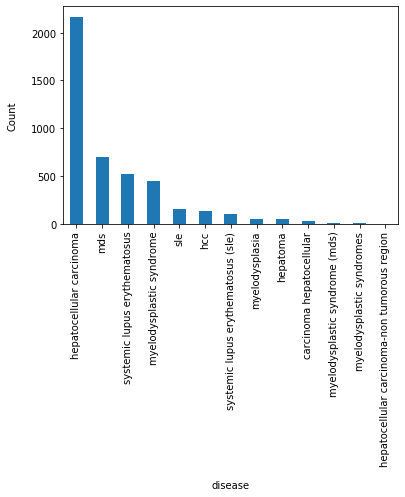

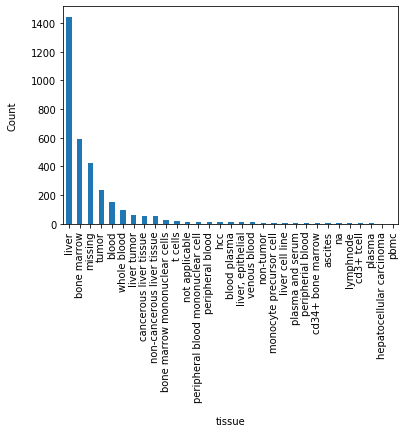

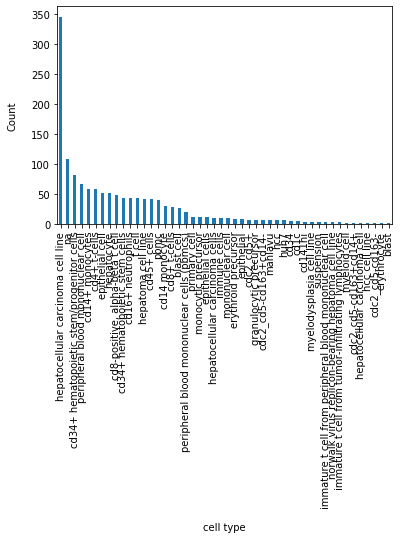

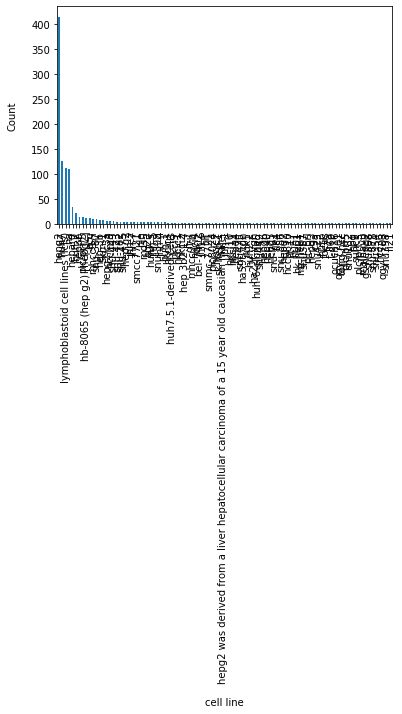

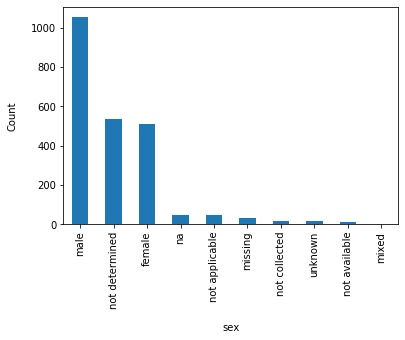

disease                   tissue            sex             cell type         cell line
hcc                       hcc               male            hcc cell line     hcclm3        1
                                            unknown         huh7              hcc           6
                                                            mahlavu           hcc           6
                          liver             not applicable  hcc               bel-7402      2
                                                                              huh-7         2
                                                                              smmc-7721     2
hepatocellular carcinoma  liver             male            epithelial        hepg2         8
                                                            epithelial cells  hepg2        11
                                                            hepatocyte        hepg2         1
                          liver cell line   male            hepato

<Figure size 432x288 with 0 Axes>

In [8]:
%%time
%matplotlib inline
# Filter the NCBI samples
%run ./scripts/step6_analysis_values.py

## <a name="s7"></a>Step 7: Export BioProject metadata to JSON

Script used: [step7_export_projects_to_json.py](scripts/step7_export_projects_to_json.py).

In [1]:
%%time
# Export projects to JSON format
%run ./scripts/step7_export_projects_to_json.py

The destination file already exist. Do you want to overwrite it [y/n]? y
Input file: ./workspace/projects/source/bioproject.xml
Output file: ./workspace/projects/exported/bioproject.json
Processing projects...
Processed projects: 100000
Processed projects: 200000
Processed projects: 300000
Processed projects: 400000
- Total projects processed: 431456
Finished processing projects
- Total projects processed: 431456
- Total projects exported: 431456
CPU times: user 1min 6s, sys: 830 ms, total: 1min 7s
Wall time: 1min 8s


## <a name="s8"></a>Step 8: Export BioSample metadata to JSON

Script used: [step8_export_samples_to_json.py](scripts/step8_export_samples_to_json.py).

In [ ]:
%%time
# Export biosamples to JSON format
%run ./scripts/step8_export_samples_to_json.py

## <a name="s9"></a>Step 9: Semantic annotation

### Ontology Selection

We took advantage of BioPortal's [Ontology Recommender API](http://data.bioontology.org/documentation) to identify the most appropriate ontologies to annotate the values of each BioSample attribute, according to the following method: 

1. Extract all the unique values for a particular field (e.g., attribute).
2. Run the Ontology Recommender for all the attribute values, with "coverage" as the only criterion to rank the ontologies.
3. Pick the top 10 recommended ontologies.
4. Select the best ontology or ontologies according to at what degree they meet the following criteria. Ontologies that do not meet any of those criteria are discarded. Ontologies that have license requirements are discarded too.
    - a. It is an ontology clearly recommended for the field by the BioLink Model. (we could call the rensi service to automatize this step).
    - b. It is an OBO ontology. (Note: There is an experimental version of the NCIT in the OBO library, so we will consider NCIT has an OBO ontology too.)
    - c. It is an specialized ontology for the field or contains comprehensive information about the topic associated to the given field (e.g., ontologies about diseases).
6. Check that there is no other ontology from the top 10 that provides significantly higher coverage. Otherwise, we could consider using it even if it does not meet 4 and 5.

The resulting ontologies were used to limit the candidate ontologies used by the Annotator. We now present the results of applying the ontology selection method described above to the 5 attributes used in our prototype.

#### Field: Disease

Field values: _hepatocellular carcinoma, mds, myelodysplastic syndrome, hepatoma, myelodysplastic syndrome (mds), hcc, sle, myelodysplasia, carcinoma hepatocellular, systemic lupus erythematosus (sle), systemic lupus erythematosus, hepatocellular carcinoma-non tumorous region, myelodysplastic syndromes._

- Step 3: Recommender top 10 (using coverage only): OCHV, MEDDRA, EFO, CCONT, NCIT, HRDO, MONDO, GAMUTS, OMIM, RETO.
- Step 4: MONDO (Criteria: a, b, c)
- Step 5: No other ontologies with much better coverage.
- Final selection: MONDO.

Note: The 1.0 package recommends to use the Disease Ontology for the disease field. Given that the BioLink Model is using MONDO (https://mondo.monarchinitiative.org/) as a reference for diseases and considering that MONDO includes DO, we used MONDO for the disease field.

#### Field: Tissue

Field values: _liver, bone marrow, nan, bone marrow mononuclear cells, t cells, blood, pbmc, hcc, hepatocellular carcinoma, whole blood, venous blood, non-cancerous liver tissue, cancerous liver tissue, tumor, liver cell line, liver tumor, peripheral blood, plasma, blood plasma, missing, na, non-tumor, peripherial blood, peripheral blood mononuclear cell, plasma and serum, monocyte precursor cell, cd3+ tcell, cd34+ bone marrow, liver, epithelial, not applicable, lymphnode, ascites._

- Step 3: Recommender top 10 (using coverage only): NCIT, BTO, OCHV, SNOMEDCT, UPHENO, DTO, IOBC, EFO, CCONT, UBERON.
- Step 4: BTO (a,b,c), UPHENO (b, c), NCIT (b?, c).
- Step 5: No other ontologies with much better coverage.
- Final selection: BTO, UPHENO, NCIT.

#### Field: Cell Type

Field values: *myeloid cell, hepatocyte, hcc, hcc cell line, mononuclear cell, cd8-positive, alpha-beta t cell, hepatocellular carcinoma cells, cd14 monocyte, hepatocellular carcinoma cell line, blast, hepatoma cell line, norwalk virus replicon-bearing hepatoma cell line, myelodysplasia cell line, erythrocyte, hepatocellular carcinoma cell, na, peripheral blood mononuclear cell, cd4+ t-cells, cd14+ monocytes, cd8+ t-cells, cd16+ neutrophils, suspension, epithelial cells, immature t cell from tumor-infiltrating lymphocytes, immature t cell from peripheral blood mononuclear cell, cd34+ hematopoietic stem cells, cd34+ hematopoietic stem/progenitor cells, erythroid precursor, monocytic precursor, granulocytic precursor, immune cells, pbmc, peripheral blood mononuclear cells (pbmcs), primary cell, epithelial cell, epithelial, cd1c, cd141hi, cd34, huh7, mahlavu, cdc2_cd5-cd163+cd14+, cdc2_cd5-cd163+cd14-, cdc2_cd5-cd163-, cdc2_cd5+, cd45+ cells, blast cell, t cell*

- Step 3: Recommender top 10 (using coverage only): BTO, EFO, CCONT, UPHENO, SYN, BIOMODELS, CL, UBERON, HHEAR, CHEAR
- Step 4: CL (b, c), BTO (b), UPHENO (b)
- Step 5: No other ontologies with much better coverage
- Final selection: CL, BTO, UPHENO

#### Field: Cell Line

Field values: *hep g2,nan,hepg2,skm-1,li-7,huh-7,plc/prf/5,snu-475,snu-449,snu-387,snu-423,jhh-7,gs-hepg2,jhh-6,snu-398,jhh-5,hep 3b2.1-7,hle,huh-1,jhh-4,snu-182,jhh-1,jhh-2,hcclm3,hepg3,hepg4,hepg5,hepg6,hepg7,huh7,plc8024,heparg,hg23,hep-3b,huh7.5,hepg2/c3a,plc-prl,hk-hep1,hep3b,snu182,tong-hcc,mz-hep1,li7a,qgy-7703,li21,ha59t-vgh,qgy-7701,focus,hbg,hlf,hcc9810,snu354,snu449,ocuch16,husp,hcc36,ht-17,plc/prf5,hep40,huh2.2,malhavu,snu368,snu398,snu423,flc4,snu475,suhc1,huh1,snu387,ha22t-vgh,nuk1,na,sk-hep-1,snu-761,snu-878,f-36p,snu-886,mhcc97h,smcc7721,mds-l,plc/prf-5,huh7.5.1-derived cells,bel-7402,smmc-7721,huh-6-clone5,c3a,mhcc97l,hepg2 was derived from a liver hepatocellular carcinoma of a 15 year old caucasian male.,lymphoblastoid cell lines (lcls),hb-8065 (hep g2) [hepg2],hkci10,hkci11,hkci2,hkci4,hkci9,hkcic1,hkcic2,hkci*

- Step 3: Top 10 (using coverage only): MCCL, EFO, CCONT, ENM, CLO, SYN, OGG, CSEO, RETO, REXO
- Step 4: CLO (b,c), EFO (c)
- Step 5: No other ontologies with much better coverage
- Final selection: CLO, EFO


#### Field: Sex

Field values: *male, female, nan, not applicable, unknown, not collected, not available, not determined, missing, na, mixed.*
Field values (after removing invalid values): *male, female, mixed.*

- Step 3: Top 10 (using coverage only): RCD, BAO, FLOPO, MS, PATO, PDRO, NIFDYS, LOINC, MEO, RADLEX
- Step 4: PATO (b,c). (Recommended by BioSample Human 1.0 Package). Other OBO ontologies that provide good coverage: 
    - FLOPO (discarded because it's focused on flora)
    - MS, PDRO (discarded because PATO provides 100% coverage and it's more generic)
- Step 5: No other ontologies with much better coverage
- Final selection: PATO

```json
ANNOTATION_PREFERRED_ONTOLOGIES_FOR_ATT_VALUES = {
    "disease": ["MONDO"],
    "tissue": ["BTO", "UPHENO", "NCIT"],
    "cell type": ["CL", "BTO", "UPHENO"],
    "cell line": ["CLO", "EFO"],
    "sex": ["PATO"]
}
```

Attribute names were annotated using the following terms:
- Disease: https://w3id.org/biolink/biolinkml/meta/Disease
- Tissue: http://ncicb.nci.nih.gov/xml/owl/EVS/Thesaurus.owl#C12801
- Cell type: https://w3id.org/biolink/biolinkml/meta/Cell
- Cell line: https://w3id.org/biolink/biolinkml/meta/CellLine
- Sex: https://w3id.org/biolink/biolinkml/meta/BiologicalSex

### Identification of preferred ontology term

We run the BioPortal's Annotator for all the attribute values in the dataset, using the ontologies selected above for each attribute name.

Script used: [step9_annotate_samples.py](scripts/step9_annotate_samples.py).

In [ ]:
%%time
# Evaluate annotations
%run ./scripts/step9_annotate_samples.py

## <a name="s10"></a>Step 10: Evaluation of annotation results

An expert manually reviewed the annotations generated (file: annotation_evaluation_info.json) and set "is-correct" as true or false to specify if the annotation was correct or not. Note that for values such as 'not applicable', 'missing', or 'NA', we considered that it was correct to not return an annotation. Therefore, when there was no annotation for those values, the expert set the value of"is-correct" to true.

Based on the expert's output, our script is able to evaluate the performance of the annotation process in terms of precision and recall.

Script used: [step10_evaluate_annotations.py](scripts/step10_evaluate_annotations.py).

In [ ]:
%%time
# Evaluate annotations
%run ./scripts/step10_evaluate_annotations.py

## <a name="s11"></a>Step 11: Store metadata into MongoDB

Script used: [step11_save_to_mongo.py](scripts/step11_save_to_mongo.py).

In [ ]:
%%time
# Save metadata to MongoDB
%run ./scripts/step11_save_to_mongo.py

### Some useful MongoDB notes

#### DB creation

```
mongo
show dbs
use ncats-demo # creates database
db.createCollection("biosample-original")
db.createCollection("biosample-annotated")
show collections
```

#### DB Dump and Restore

```
mongodump --db ncats-demo  --out .
mongorestore --db ncats-demo --drop ncats-demo (where ncats demo is the directory of the last backup)
```